In [1]:
import matplotlib.pyplot as plt
import torch

from training.kitti_data.augmenters import EigenAugmenter
from training.kitti_data.patch_samplers import EigenPatchSampler
from training.kitti_data.kitti_raw import KITTIRAWDataset

In [3]:
dataset = KITTIRAWDataset(
        EigenAugmenter(),
        EigenPatchSampler(16),
        '/media/antonio/523f31c5-dc82-4dce-8457-65b5dd1f19e4/kitti',
        'train',
        'png',
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.05291894..1.0000002].


torch.Size([16, 3, 172, 576]) torch.Size([16, 172, 576]) torch.Size([16, 172, 576]) torch.Size([1, 1, 172, 576])


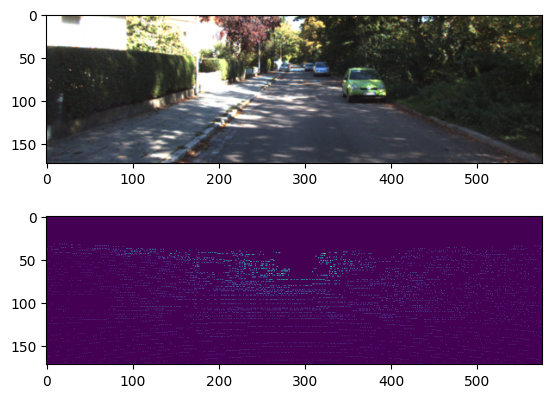

torch.Size([16, 3, 172, 576])


In [6]:
for image, depth_map, valid_mask, overlap_mask in dataset:
    print(image.shape, depth_map.shape, valid_mask.shape, overlap_mask.shape)
    plt.subplot(2, 1, 1)
    plt.imshow(image[0].permute(1, 2, 0))
    plt.subplot(2, 1, 2)

    plt.imshow(depth_map[0])
    plt.show()

    print(image.shape)
    break